In [50]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import set_config
from keras.layers import Dense,BatchNormalization,Dropout,LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
for dirname,_,filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

./Heart Failure Prediction.ipynb
./heart_failure_clinical_records_dataset.csv
./.ipynb_checkpoints\Heart Failure Prediction-checkpoint.ipynb


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
data_df=pd.read_csv('./heart_failure_clinical_records_dataset.csv')
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [22]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


[Text(0, 0, '203'), Text(0, 0, '96')]

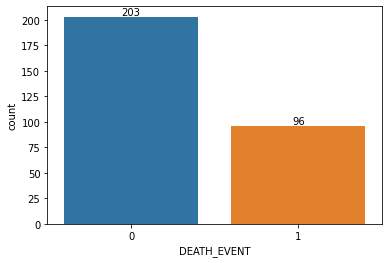

In [23]:
ax=sns.countplot(x=data_df["DEATH_EVENT"])
ax.bar_label(ax.containers[0])

In [32]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:>

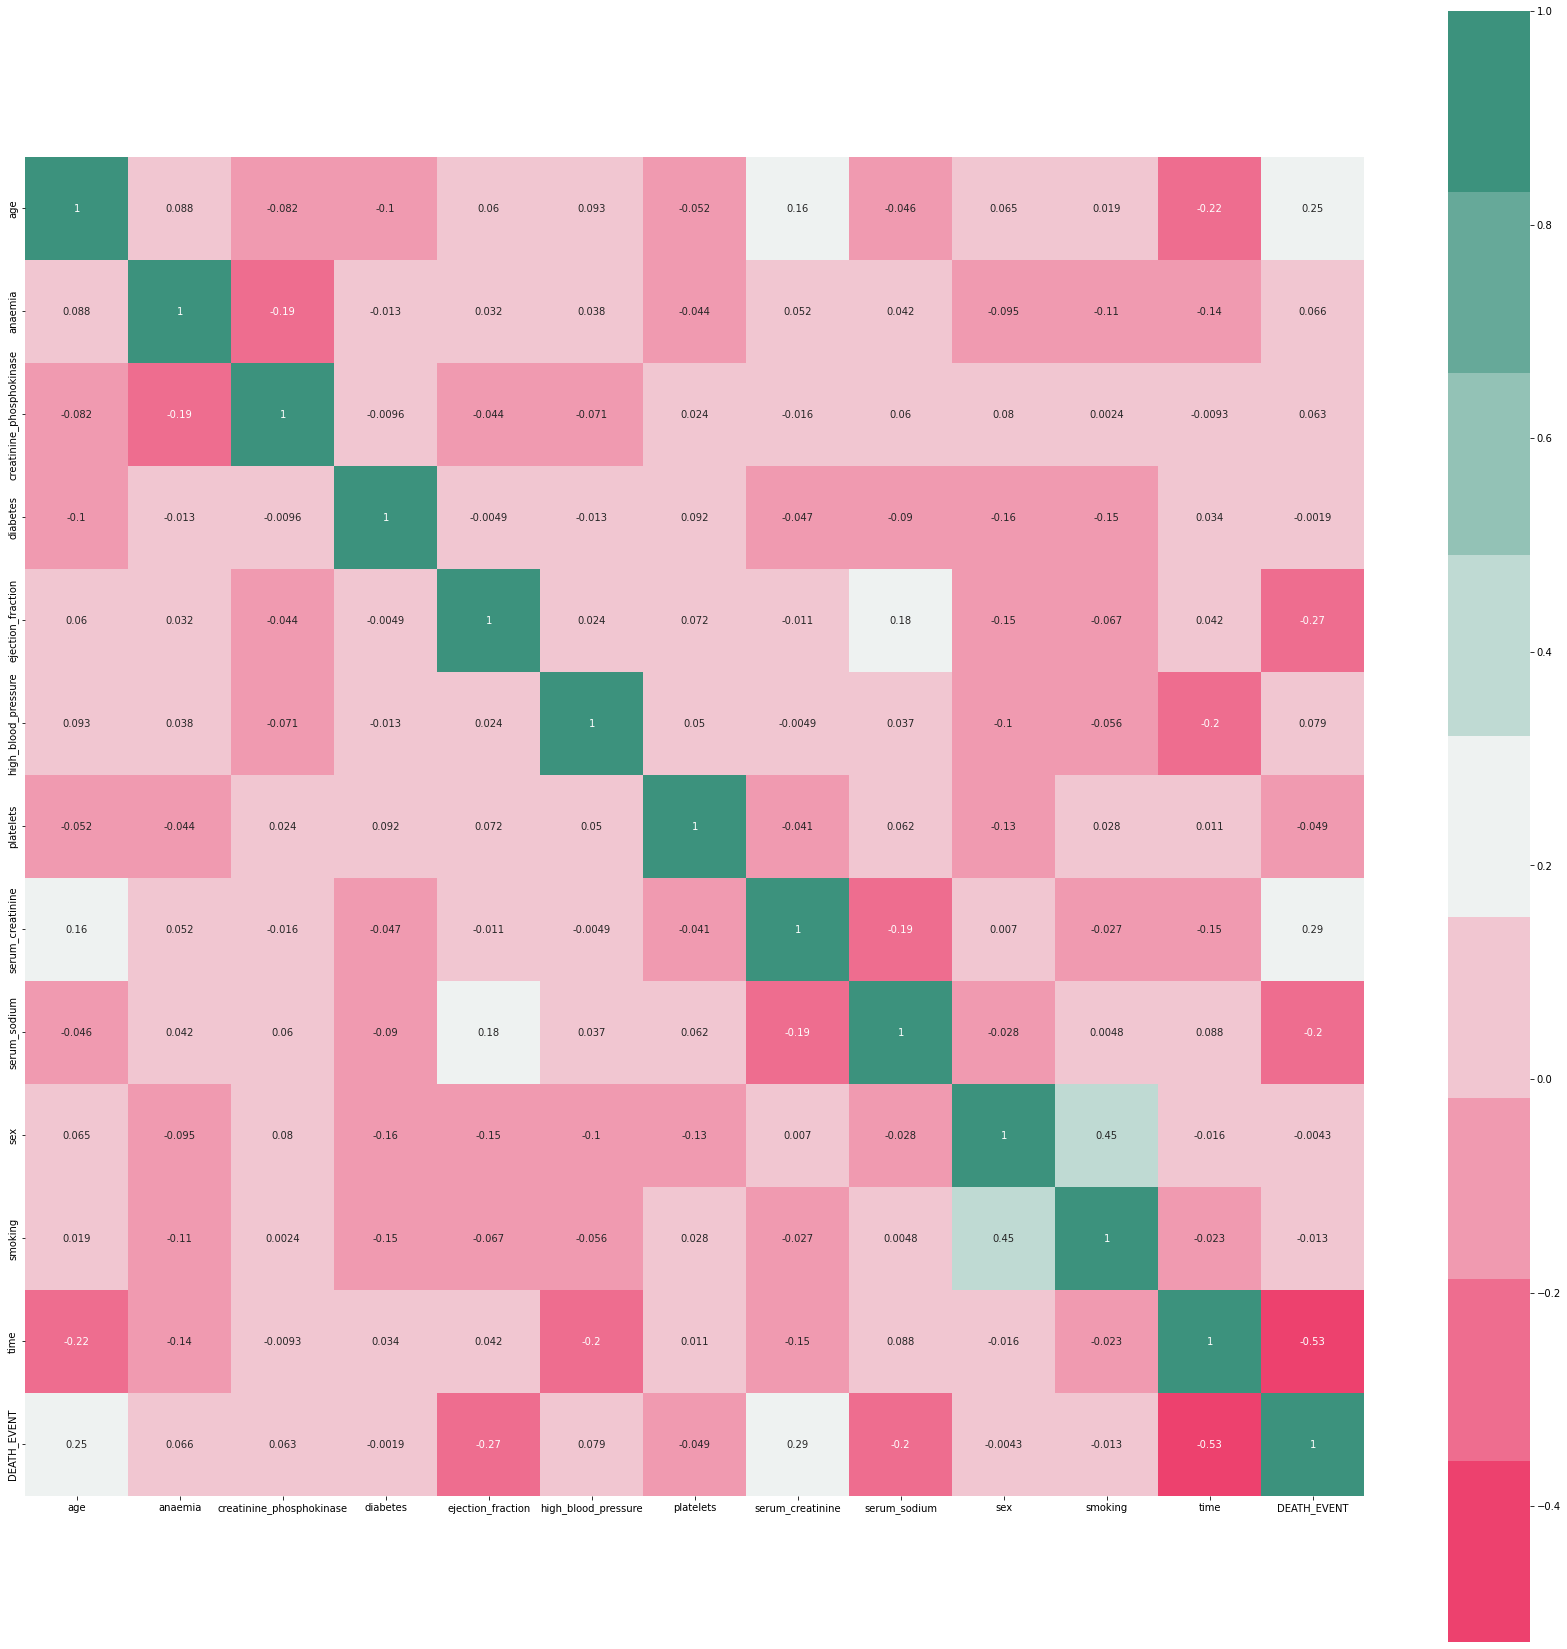

In [30]:
cmap=sns.diverging_palette(2,165,s=80,l=55,n=9)
corrmat=data_df.corr()
plt.subplots(figsize=(30,30))
sns.heatmap(corrmat,cmap=cmap,annot=True,square=True)

Text(0.5, 1.0, 'Distribution of age')

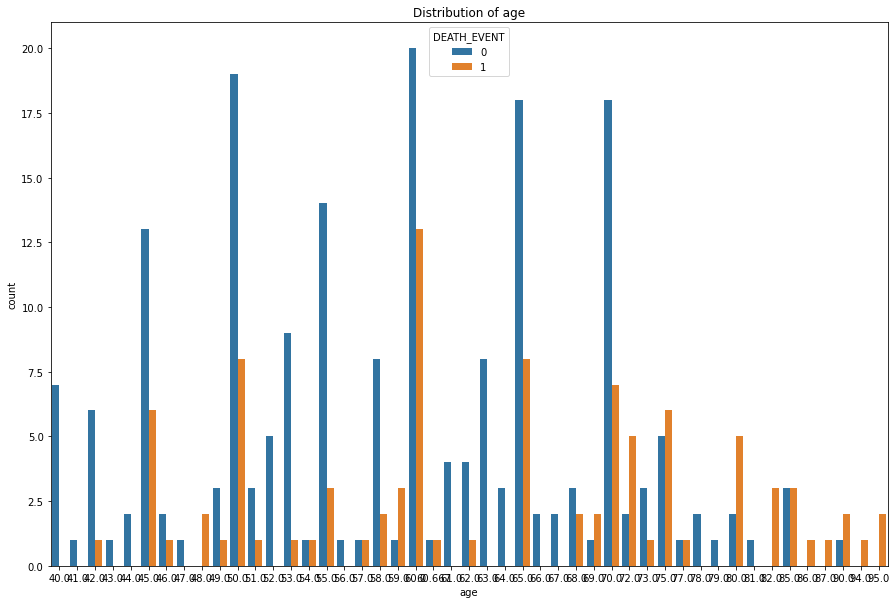

In [34]:
plt.figure(figsize=(15,10))
Days_of_week=sns.countplot(x=data_df['age'],data=data_df,hue='DEATH_EVENT')
Days_of_week.set_title('Distribution of age')

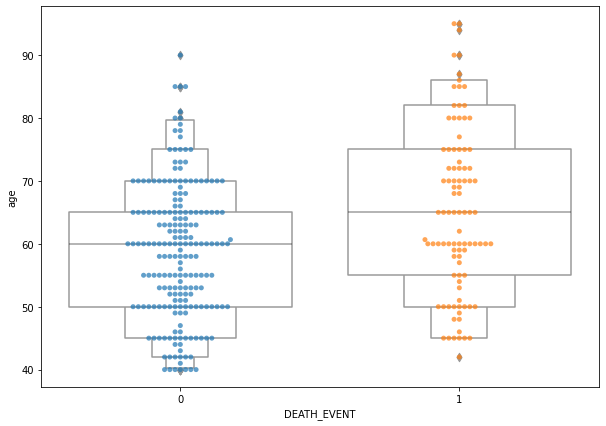

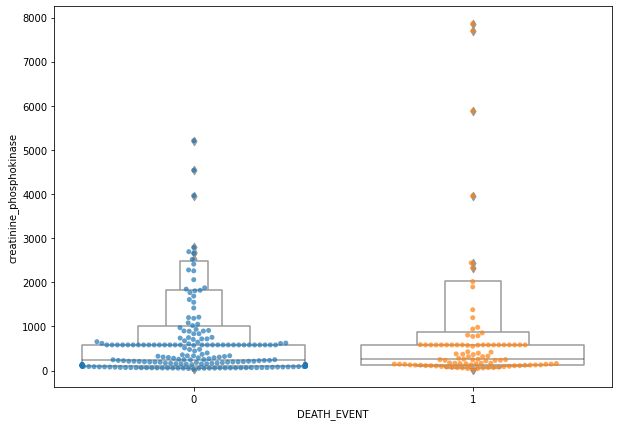

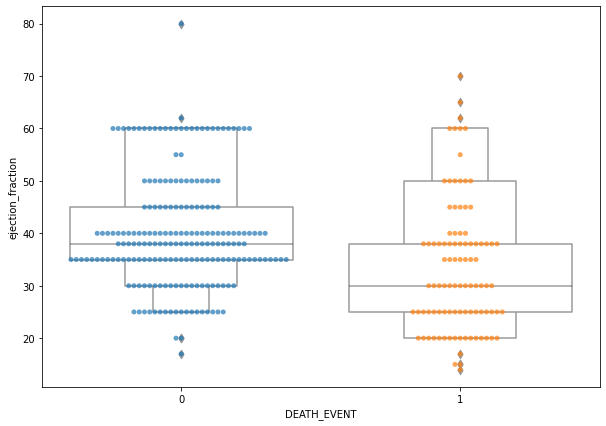

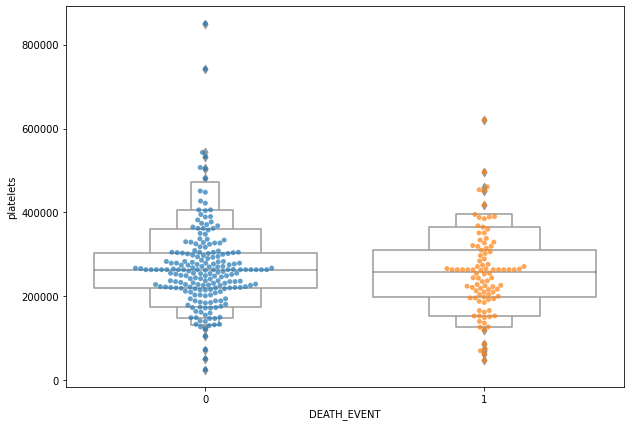

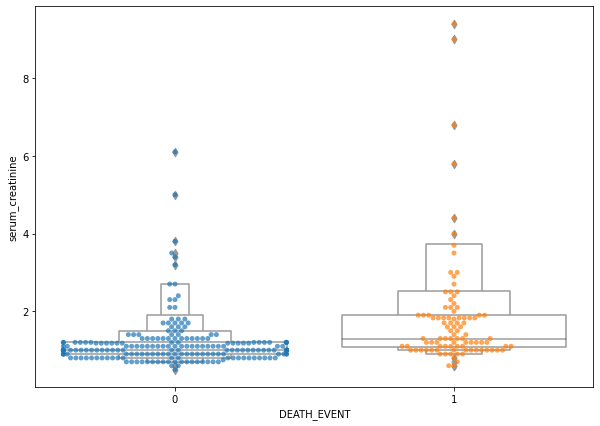

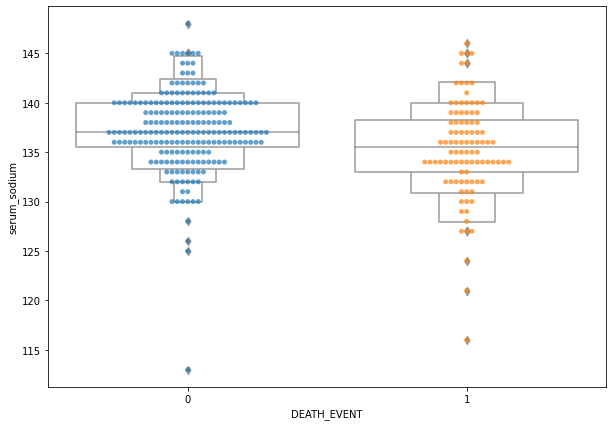

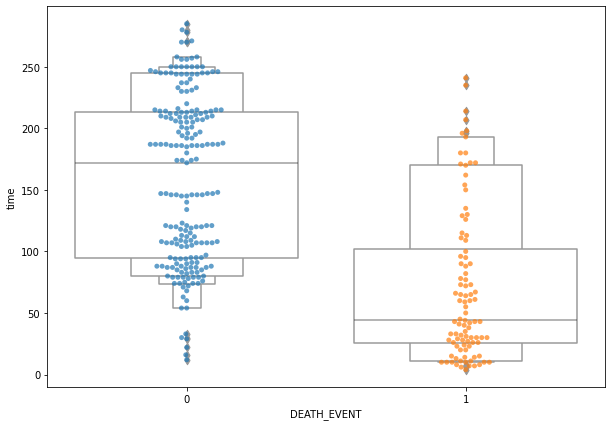

In [38]:
feature=["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=data_df['DEATH_EVENT'],y=data_df[i],alpha=0.7)
    sns.boxenplot(x=data_df['DEATH_EVENT'],y=data_df[i],palette=['white','white'])
    plt.show()

In [40]:
x=data_df.drop(["DEATH_EVENT"],axis=1)
y=data_df["DEATH_EVENT"]
x.shape,y.shape

((299, 12), (299,))

In [44]:
col_names=list(x.columns)
s_scaler=preprocessing.StandardScaler()
x_scaled=s_scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=col_names)
#x_scaled.describe().T

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=25)

In [52]:
set_config(display='diagram')
model1=svm.SVC()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
accuracy_score(y_pred,y_test)

0.8333333333333334

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        39
           1       0.82      0.67      0.74        21

    accuracy                           0.83        60
   macro avg       0.83      0.79      0.81        60
weighted avg       0.83      0.83      0.83        60



array([[36,  3],
       [ 7, 14]], dtype=int64)

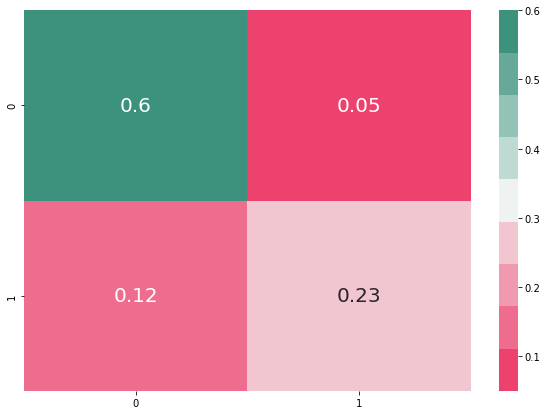

In [56]:
cmap1=sns.diverging_palette(2,165,s=80,l=55,n=9)
plt.subplots(figsize=(10,7))
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix),cmap=cmap1,annot=True,annot_kws={'size':20})
cf_matrix

In [58]:
early_stopping=callbacks.EarlyStopping(min_delta=0.001,patience=20,restore_best_weights=True)
model=Sequential()
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu',input_dim=12))
model.add(Dense(units=12,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=25,epochs=100,callbacks=[early_stopping],validation_split=0.25)

Epoch 1/100
8/8 [==============================] - 1s 21ms/step - loss: 0.6926 - accuracy: 0.6480 - val_loss: 0.6907 - val_accuracy: 0.8167
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.6425 - val_loss: 0.6884 - val_accuracy: 0.8167
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.6425 - val_loss: 0.6864 - val_accuracy: 0.8167
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.6425 - val_loss: 0.6841 - val_accuracy: 0.8167
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.6425 - val_loss: 0.6812 - val_accuracy: 0.8167
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.6425 - val_loss: 0.6778 - val_accuracy: 0.8167
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.6425 - val_loss: 0.6736 - val_accuracy: 0.8167
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.8436 - val_loss: 0.2597 - val_accuracy: 0.9000
Epoch 60/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3478 - accuracy: 0.8492 - val_loss: 0.2577 - val_accuracy: 0.9000
Epoch 61/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3714 - accuracy: 0.8659 - val_loss: 0.2523 - val_accuracy: 0.9000
Epoch 62/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.8547 - val_loss: 0.2476 - val_accuracy: 0.9000
Epoch 63/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8715 - val_loss: 0.2448 - val_accuracy: 0.9000
Epoch 64/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3747 - accuracy: 0.8715 - val_loss: 0.2396 - val_accuracy: 0.9000
Epoch 65/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3672 - accuracy: 0.8380 - val_loss: 0.2421 - val_accuracy: 0.9000
Epoch 66/100
8/8 [===============

In [61]:
val_accuracy=np.mean(history.history['val_accuracy'])
print(f'accuracy is: {val_accuracy*100}%')

accuracy is: 87.81745895033791%


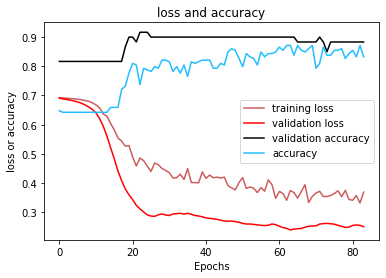

In [63]:
history_df=pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['loss']],"#CD5C5C",label='training loss')
plt.plot(history_df.loc[:,['val_loss']],"#FF0000",label='validation loss')
plt.plot(history_df.loc[:,['val_accuracy']],"#000000",label='validation accuracy')
plt.plot(history_df.loc[:,['accuracy']],"#20BEFF",label='accuracy')
plt.title('loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss or accuracy')
plt.legend(loc='best')
plt.show()

In [69]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)
np.set_printoptions()

array([[35,  4],
       [ 5, 16]], dtype=int64)

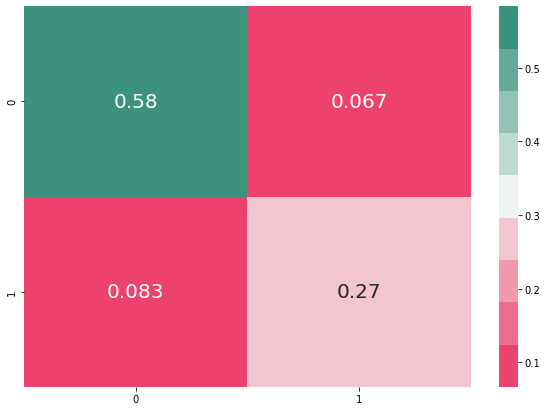

In [70]:
cmap2=sns.diverging_palette(2,165,s=80,l=55,n=9)
plt.subplots(figsize=(10,7))
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix),cmap=cmap2,annot=True,annot_kws={'size':20})
cf_matrix

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        39
           1       0.80      0.76      0.78        21

    accuracy                           0.85        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.85      0.85      0.85        60

